# BIVARIATE ANALYSIS - WORLD WIDE SUICIDE RATES


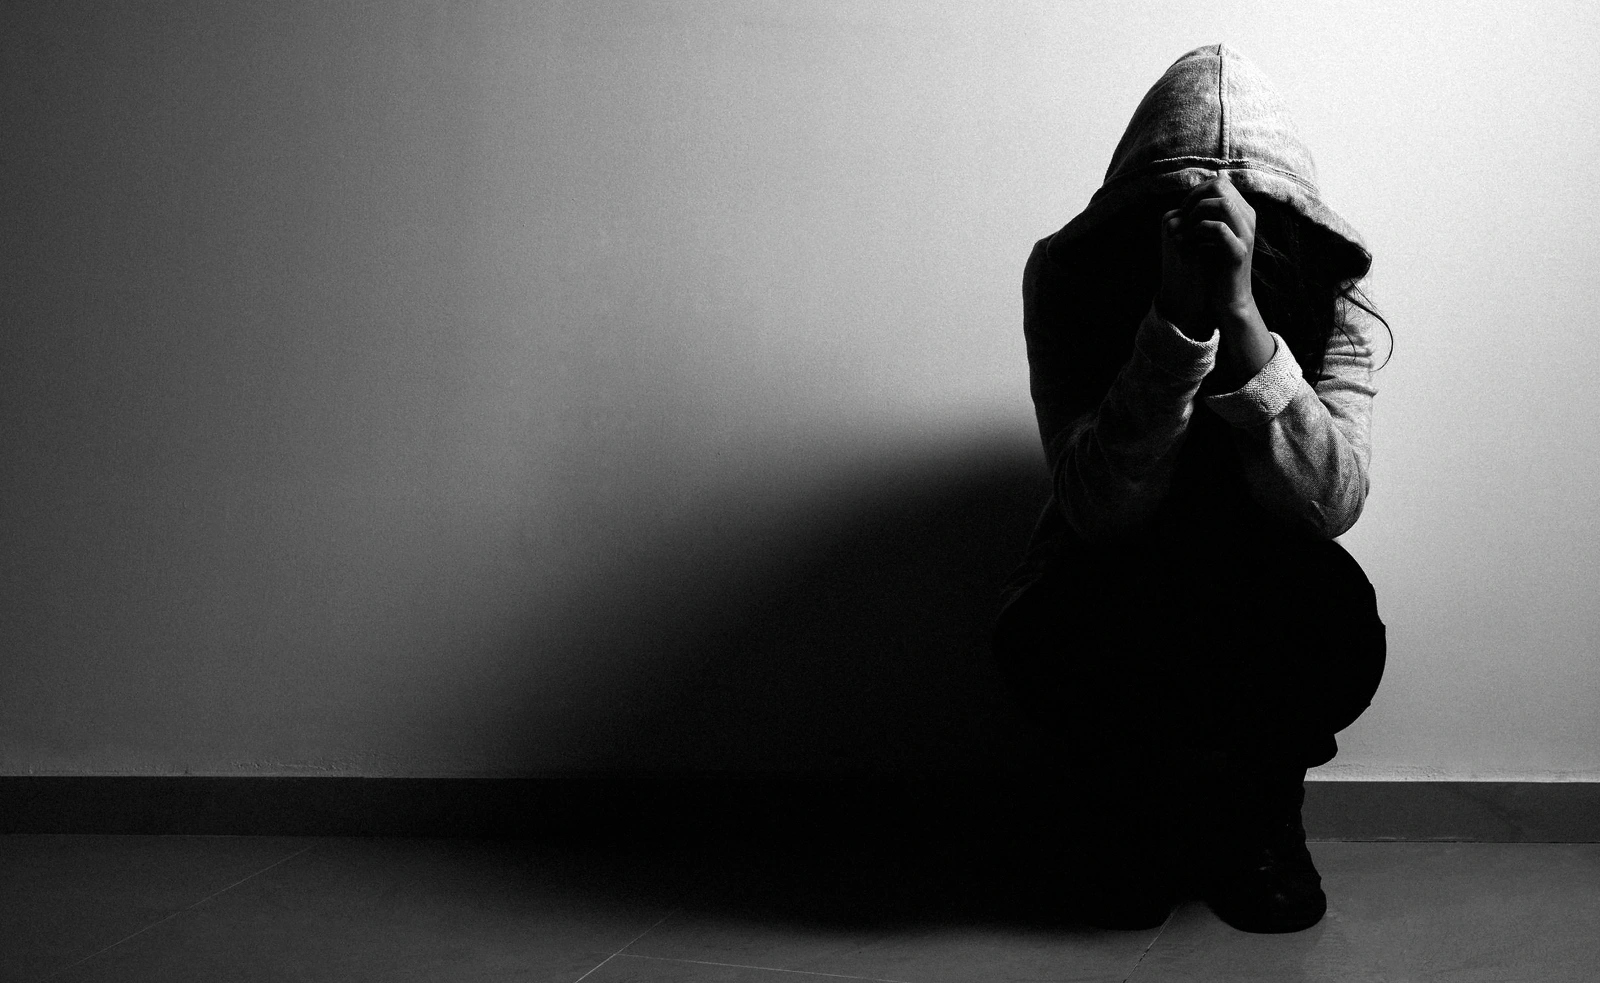

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('suicide_rates.csv')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [5]:
df.shape

(27820, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [7]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [8]:
#df.isna().mean()

#or 

def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(df)

,Total,Percent
HDI for year,19456,0.699353
country,0,0.000000
year,0,0.000000
sex,0,0.000000
age,0,0.000000
suicides_no,0,0.000000
population,0,0.000000
suicides/100k pop,0,0.000000
country-year,0,0.000000
gdp_for_year ($),0,0.000000


In [9]:
df.drop('HDI for year',axis=1)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,"63,067,077,179",2309,Generation Z


<AxesSubplot:xlabel='suicides_no', ylabel='year'>

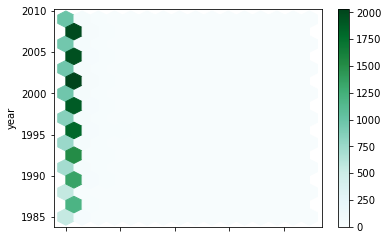

In [11]:
df[df['year'] < 2010].plot.hexbin(x='suicides_no', y='year', gridsize=15)


<AxesSubplot:>

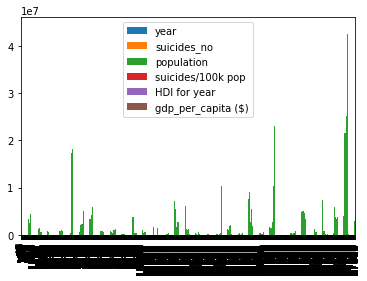

In [12]:
df.plot.bar(stacked=True)

<AxesSubplot:>

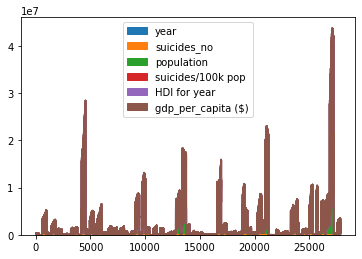

In [13]:
df.plot.area()

<AxesSubplot:xlabel='country'>

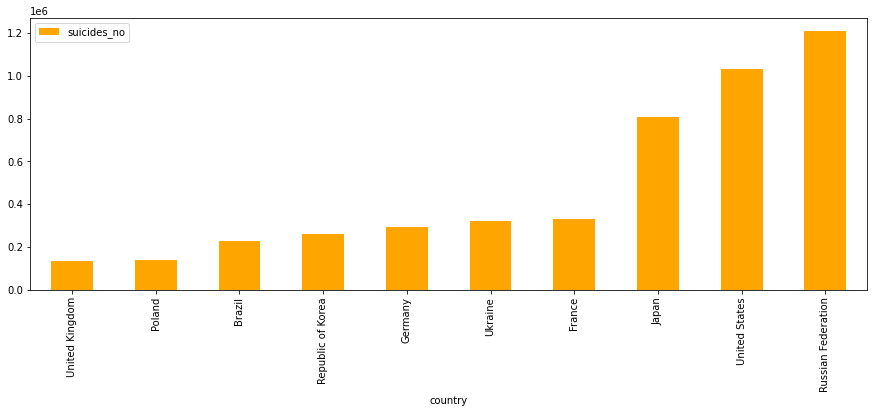

In [14]:
df.groupby(by=['country'])['suicides_no'].sum().reset_index().sort_values(['suicides_no']).tail(10).plot(x='country',y='suicides_no',kind='bar',color='orange',figsize=(15,5))

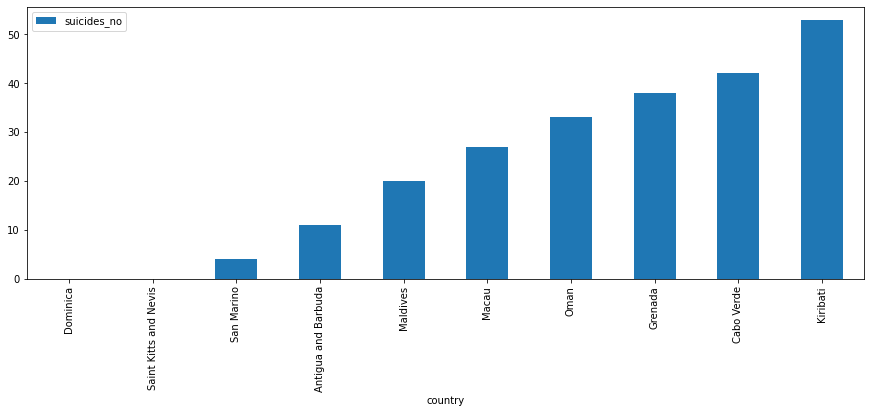

In [15]:
df.groupby(by=['country'])['suicides_no'].sum().reset_index().sort_values(['suicides_no'],
                    ascending=True).head(10).plot(x='country',y='suicides_no',kind='bar', figsize=(15,5))

plt.show()

Observation:

Russia has the highest suicide rate, followed by the US and Japan.
Russia, the US, and Japan have exceptionally high counts of suicides compared to the others in the lot.

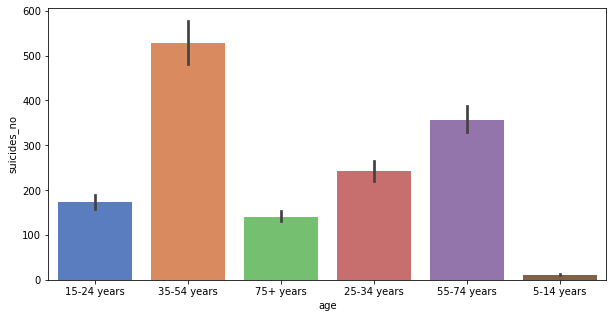

In [16]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x='age', y='suicides_no', data=df, palette='muted')

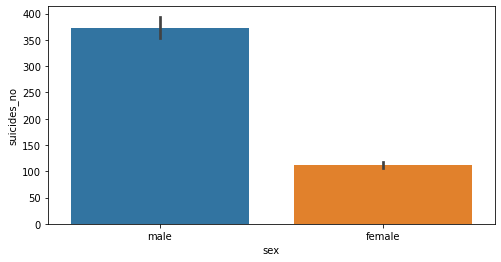

In [17]:
plt.figure(figsize=(8,4))
ax = sns.barplot(x="sex", y="suicides_no", data=df)

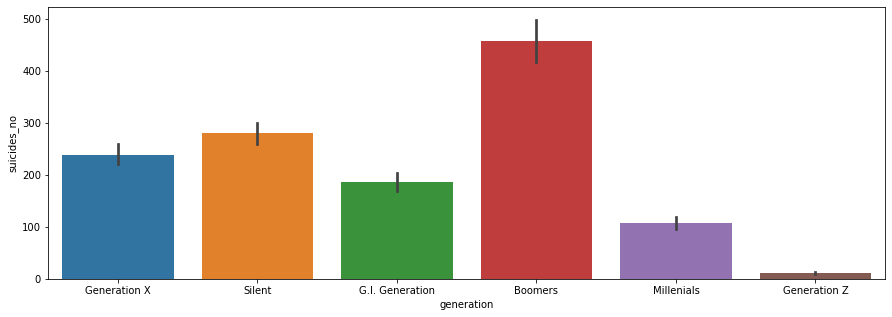

In [18]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x='generation', y='suicides_no', data=df)

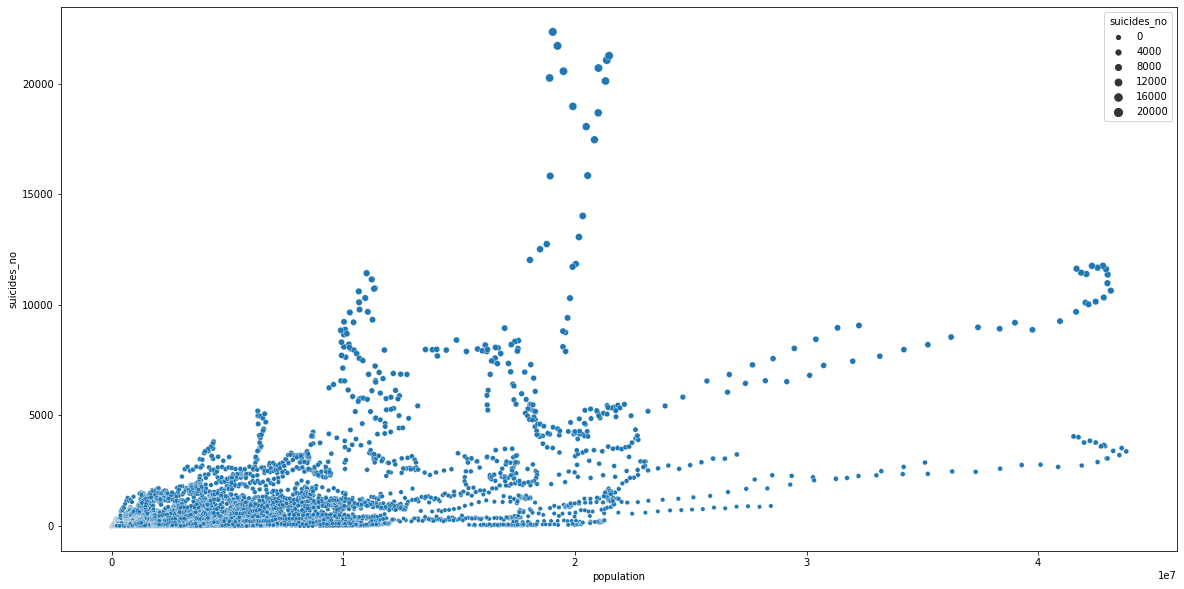

In [19]:
figure = plt.figure(figsize=(20,10))
ax = sns.scatterplot(x=df['population'],y='suicides_no', data=df, size = "suicides_no") # scatter plot

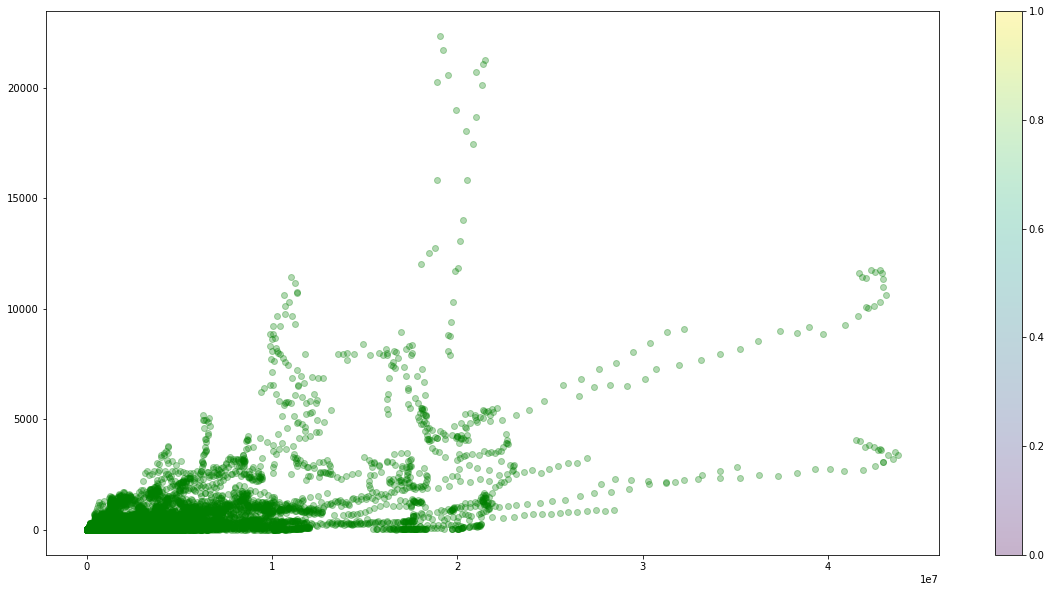

In [20]:
figure = plt.figure(figsize=(20,10))
ax = plt.scatter(x=df['population'],y='suicides_no', data=df,alpha=0.3, cmap='viridis',color='g')
plt.colorbar();# scatter plot

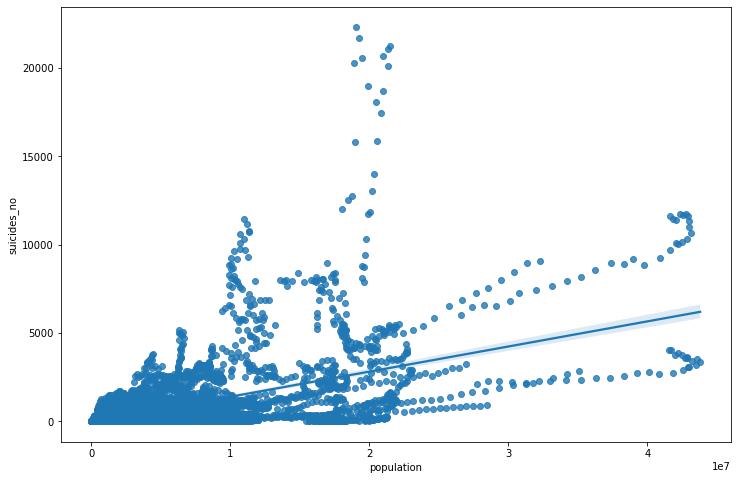

In [21]:
figure = plt.figure(figsize=(12,8))
ax = sns.regplot(x='population',y='suicides_no', data=df)

<AxesSubplot:xlabel='population', ylabel='suicides_no'>

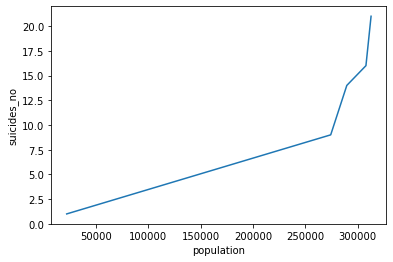

In [22]:
sns.lineplot(x='population',y='suicides_no', data=df.head())

<AxesSubplot:>

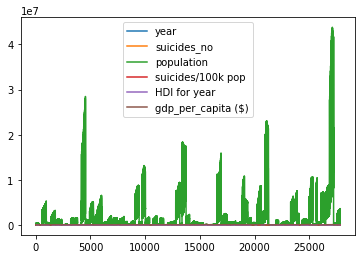

In [23]:
df.plot.line()

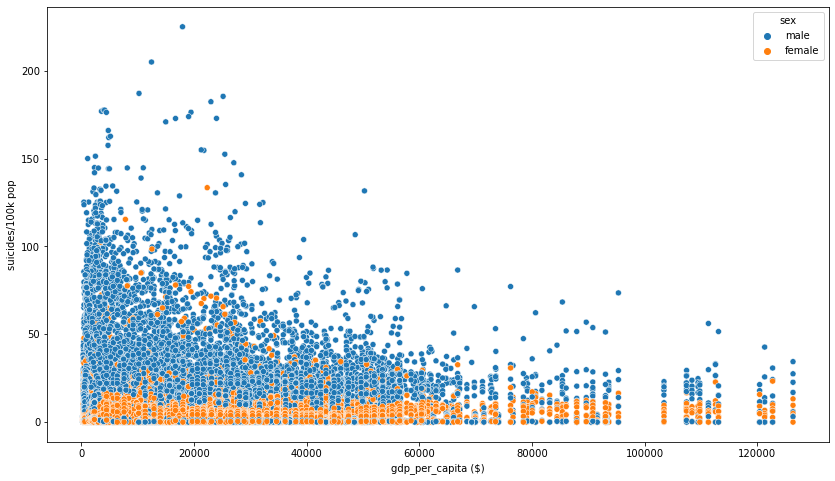

In [24]:
figure = plt.figure(figsize=(14,8))

sns.scatterplot(x='gdp_per_capita ($)', y='suicides/100k pop', data=df, hue='sex') 
plt.show()

Observation:

Looks like higher suicide rates are a bit more prevalent in countries with low GDP per capita. However, the gender gap seems to reduce drastically as the GPD per capita increases.



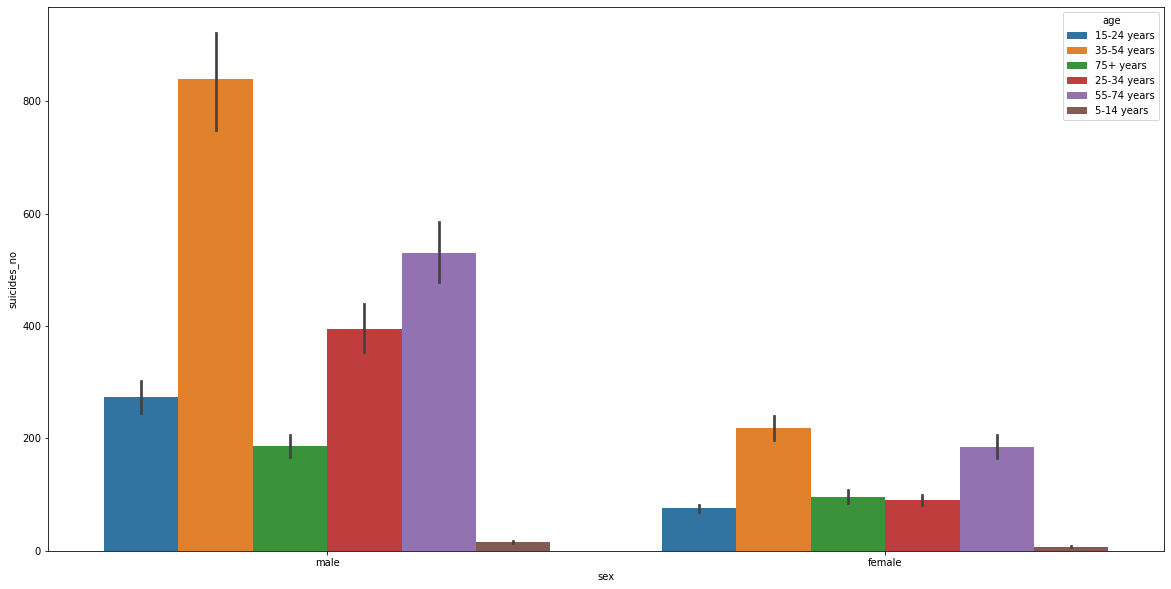

In [25]:
plt.figure(figsize=(20,10))
sns.barplot(data=df,x='sex',y='suicides_no',hue='age')
plt.show()

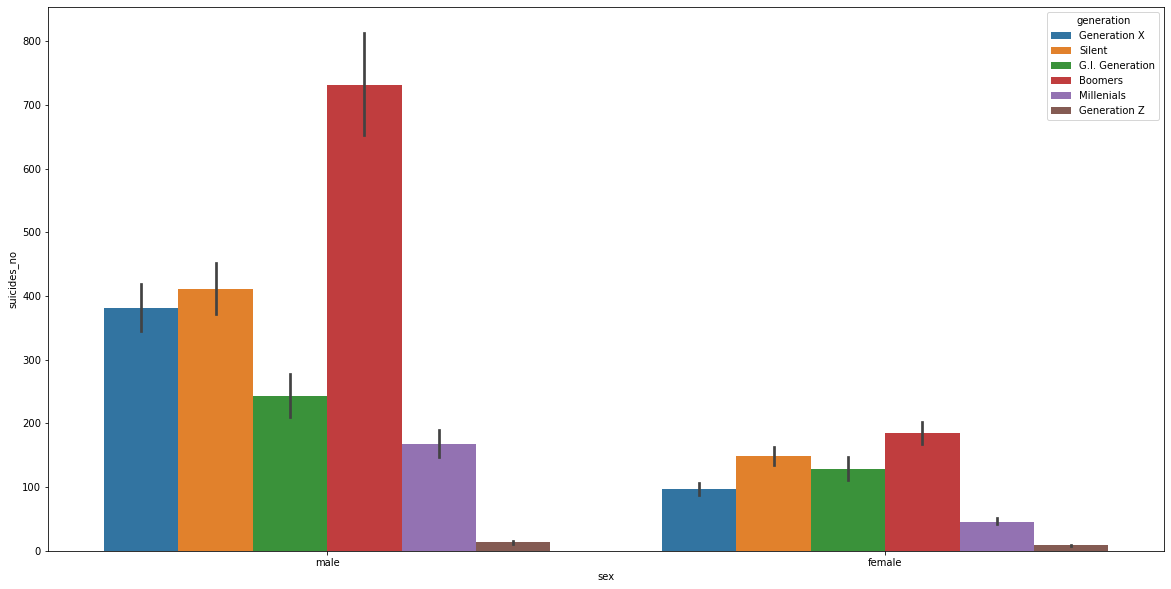

In [26]:
plt.figure(figsize=(20,10))
sns.barplot(data=df,x='sex',y='suicides_no',hue='generation')
plt.show()

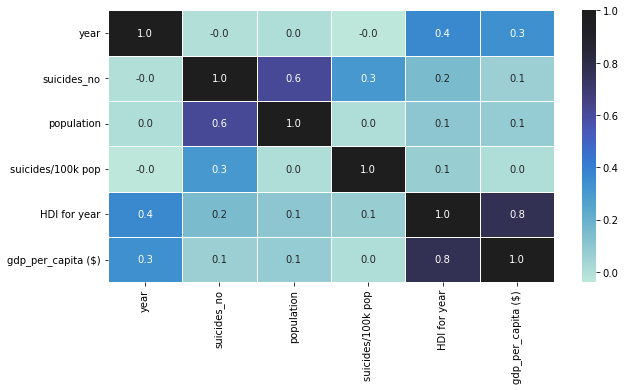

In [27]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1 )  # heatmap
plt.show()

Observation:

The darker the color higher the correlation. None of the attributes seem to correlate with real significance. Some obvious correlations are that in a larger population, it is very likely that the number of suicides will be more. Human Development Index - GDP per capita is the only pair with the most correlation.

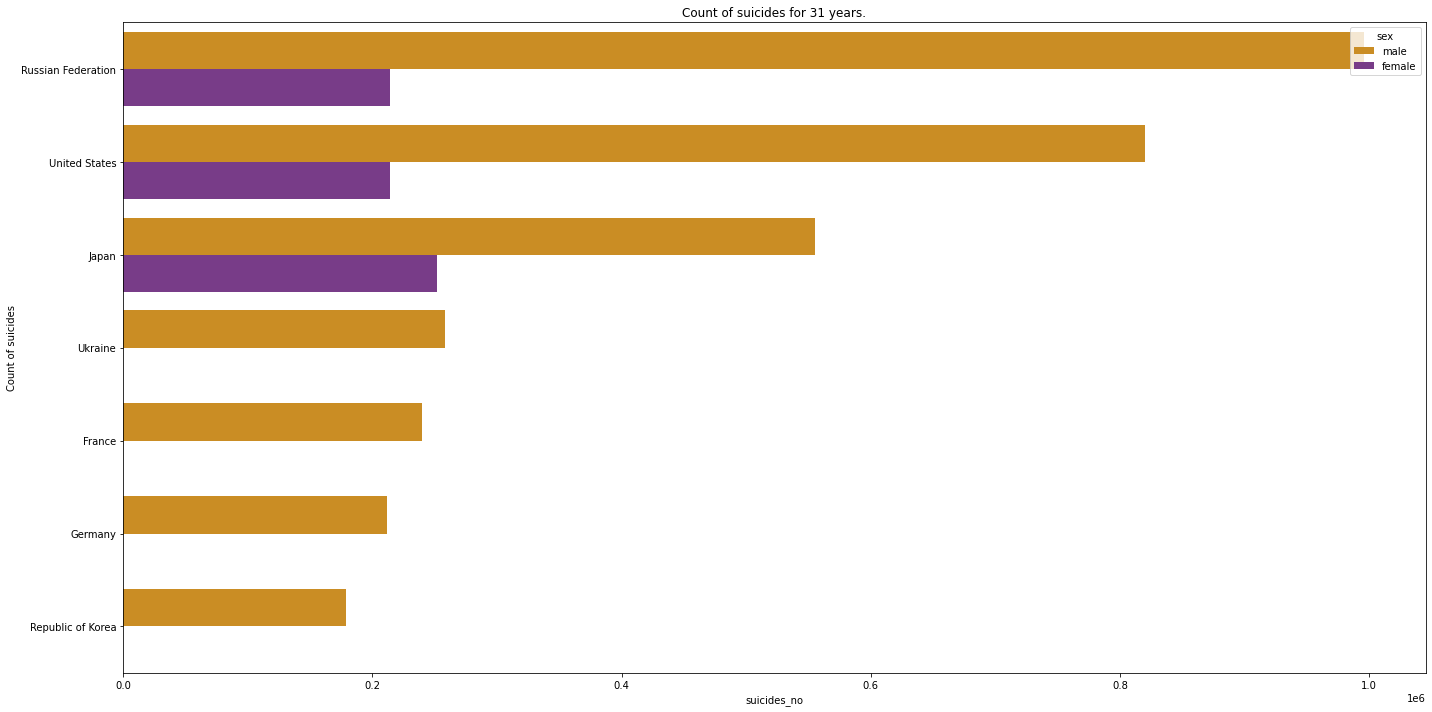

In [28]:
suic_sum_m = df['suicides_no'].groupby([df['country'],df['sex']]).sum()  # number of suicides by country and sex
suic_sum_m = suic_sum_m.reset_index().sort_values(by='suicides_no',ascending=False) # sort in descending order
most_cont_m = suic_sum_m.head(10)  # getting the top ten countries in terms of suicides

fig = plt.figure(figsize=(20,10))
plt.title('Count of suicides for 31 years.')

sns.barplot(y='country',x='suicides_no',hue='sex',data=most_cont_m,palette='CMRmap_r');

plt.ylabel('Count of suicides')
plt.tight_layout()

In [29]:
df['country'].unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

<AxesSubplot:ylabel='suicides_no'>

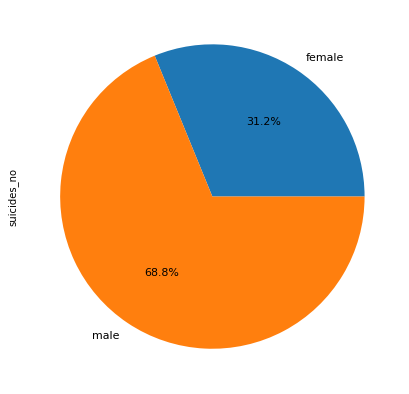

In [32]:
df[df['country'] == 'Japan'].groupby('sex')['suicides_no'].sum().plot(kind='pie', figsize=(7, 7), autopct='%1.1f%%', fontsize=11)

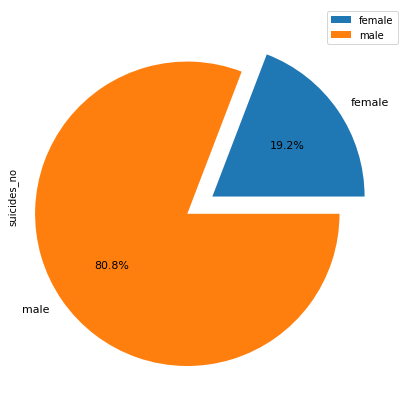

In [33]:
df[df['country'] == 'Ukraine'].groupby('sex')['suicides_no'].sum().plot(kind='pie', figsize=(7, 7), autopct='%1.1f%%', fontsize=11,explode=[0.0,0.2]);
plt.legend()
plt.show()

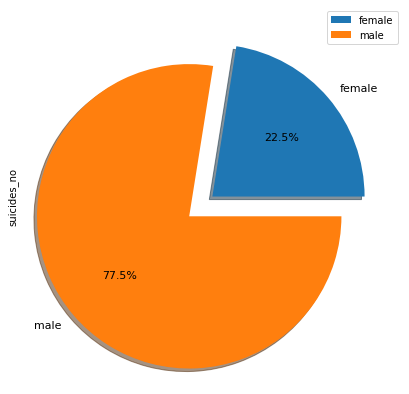

In [34]:
df[df['country'] == 'Canada'].groupby('sex')['suicides_no'].sum().plot(kind='pie', figsize=(7, 7), autopct='%1.1f%%', fontsize=11,explode=[0.0,0.2],shadow=True);
plt.legend()
plt.show()

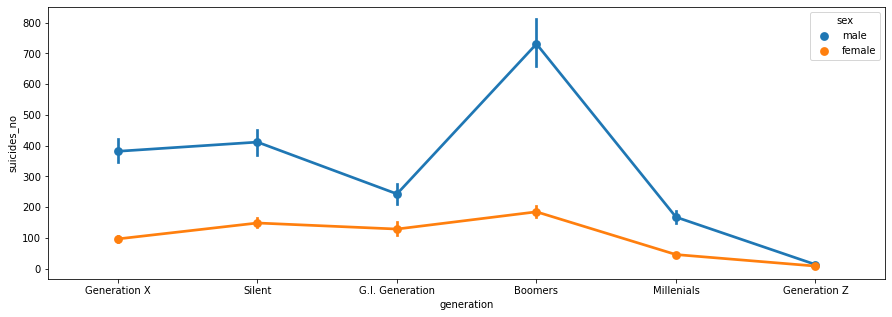

In [35]:
plt.figure(figsize=(15,5))
sns.pointplot(x="generation", y="suicides_no", hue = 'sex',  data=df)
plt.show()

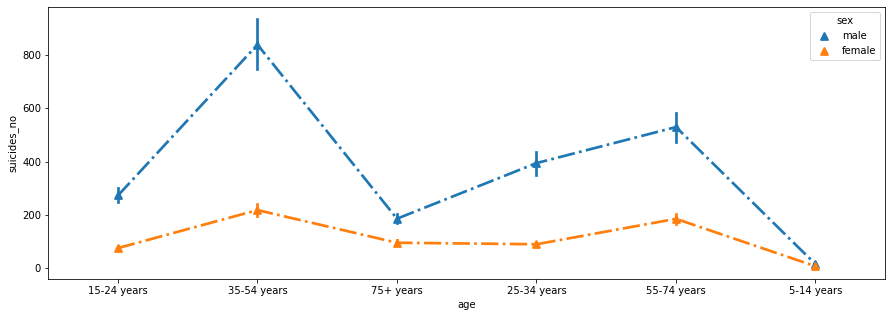

In [36]:
plt.figure(figsize=(15,5))
sns.pointplot(x="age", y="suicides_no",linestyles='-.',markers='^', hue = 'sex',data=df)
plt.show()

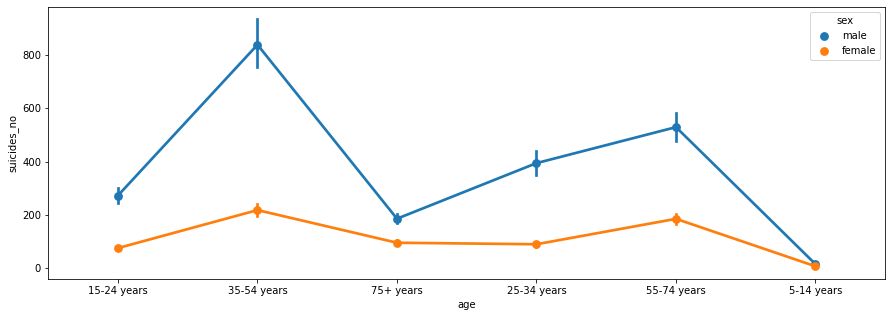

In [37]:
plt.figure(figsize=(15,5))
sns.pointplot(x="age", y="suicides_no", hue = 'sex',data=df)
plt.show()

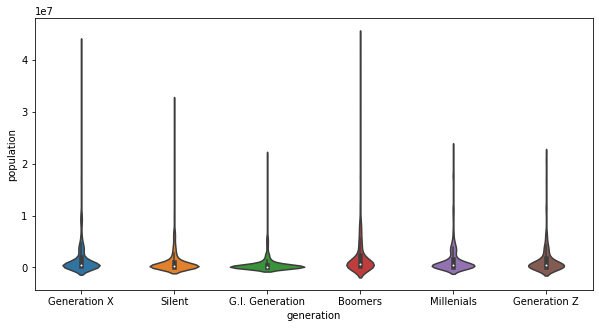

In [38]:
 
plt.figure(figsize=(10,5))
sns.violinplot(x=df.generation, y=df['population'])
plt.show()

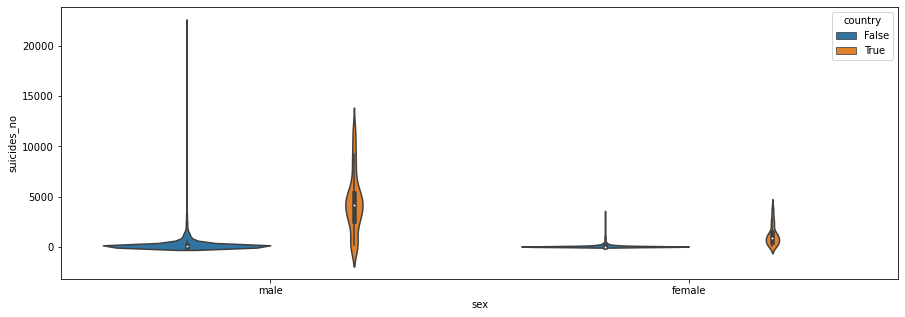

In [39]:
plt.figure(figsize=(15,5))
sns.violinplot(x=df.sex, y=df['suicides_no'],hue=df['country']=='United States')
plt.show()

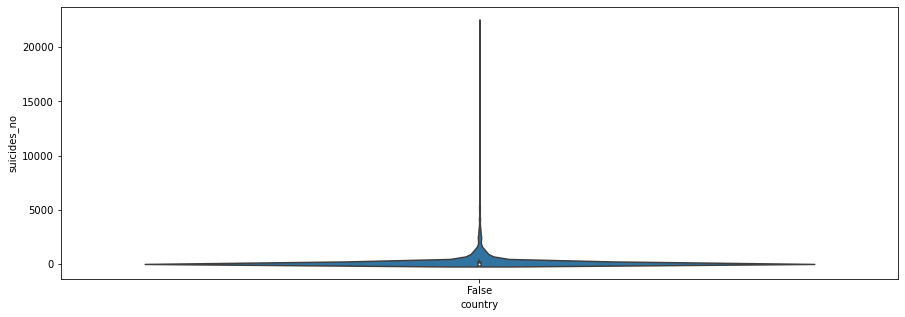

In [40]:
plt.figure(figsize=(15,5))
sns.violinplot(x=df['country']=='canada', y=df['suicides_no'],style = 'whitegrid')
plt.show()


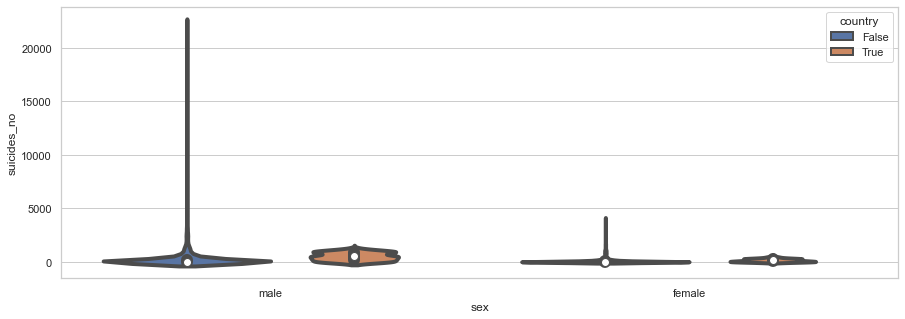

In [41]:
plt.figure(figsize=(15,5))
sns.set(style='whitegrid')
sns.violinplot(x=df.sex, y=df['suicides_no'],hue=df['country']=='Italy',style = 'whitegrid',linewidth = 4)
plt.show()


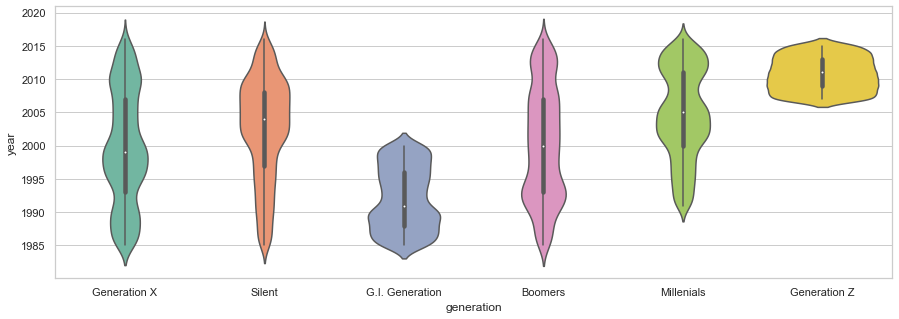

In [42]:
plt.figure(figsize=(15,5))
sns.violinplot(x=df.generation, y=df['year'],style = 'whitegrid',palette="Set2",dodge=True)
plt.show()

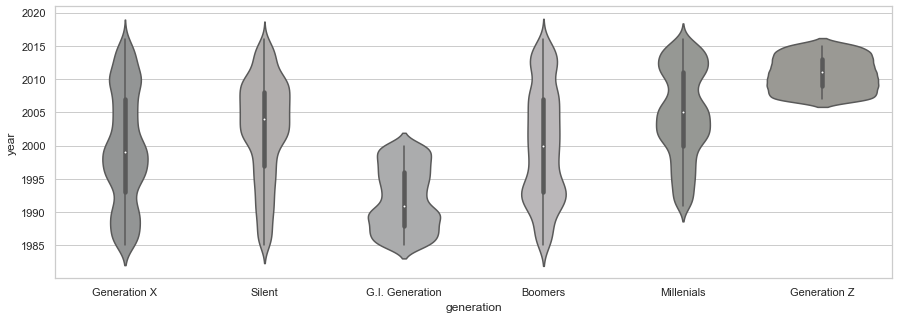

In [43]:
plt.figure(figsize=(15,5))
sns.violinplot(x=df.generation, y=df['year'],style = 'whitegrid',palette="Set2",dodge=True,saturation =0.03)
plt.show()

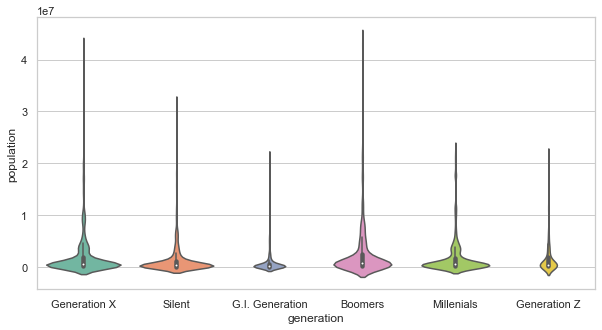

In [44]:
plt.figure(figsize=(10,5))
sns.violinplot(x=df.generation, y=df['population'],palette="Set2",split=True,scale='count')
plt.show()

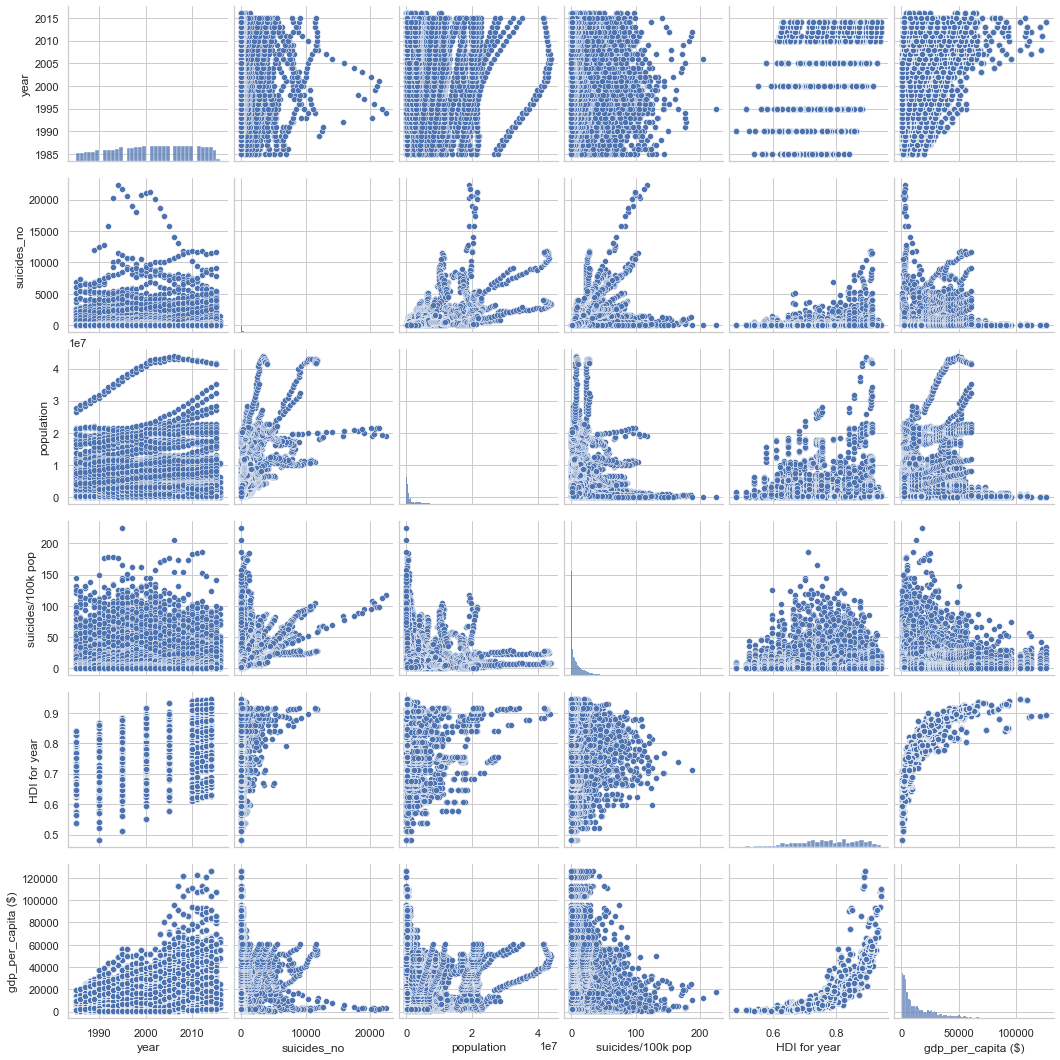

In [45]:
sns.pairplot(df)

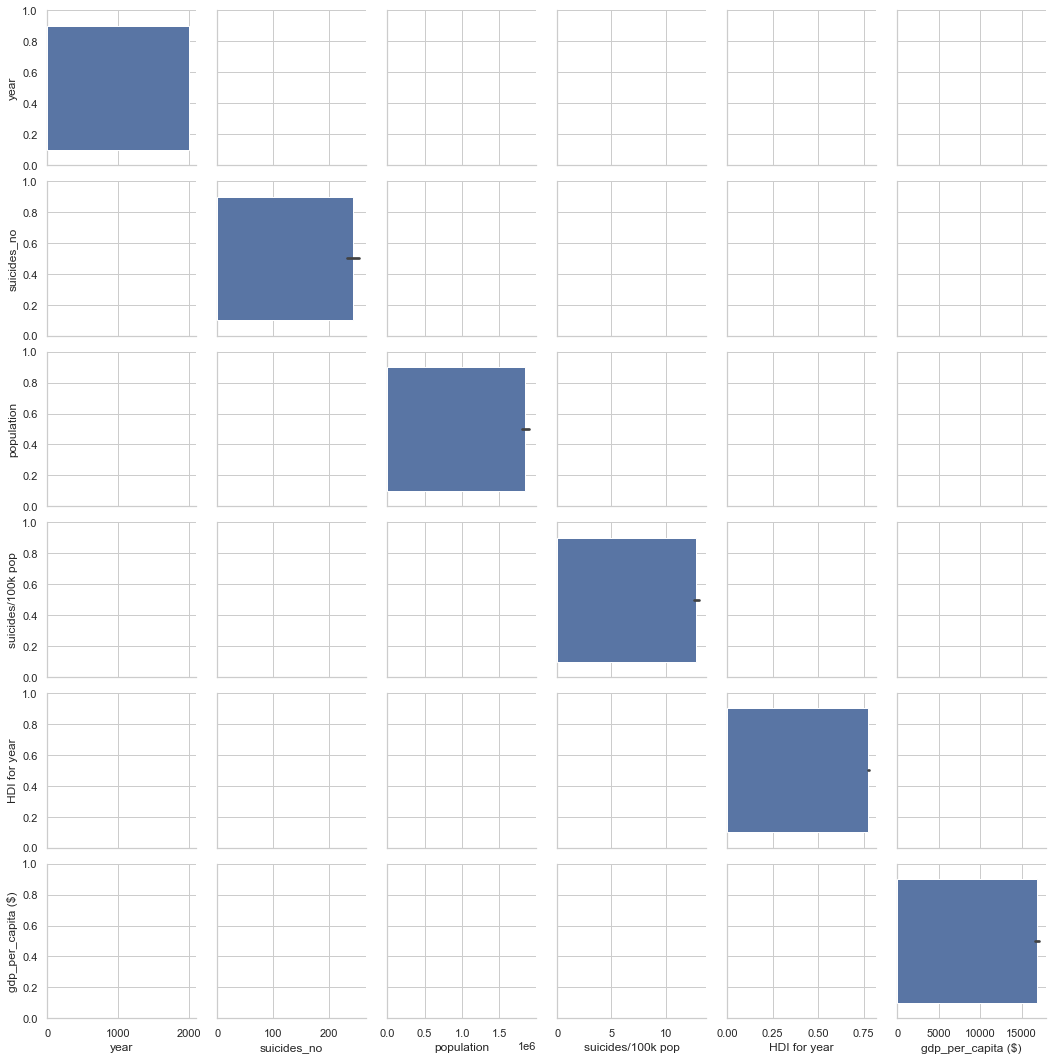

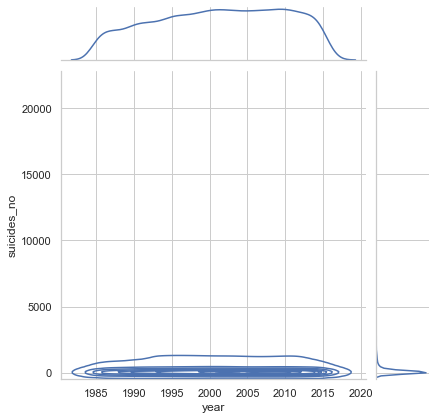

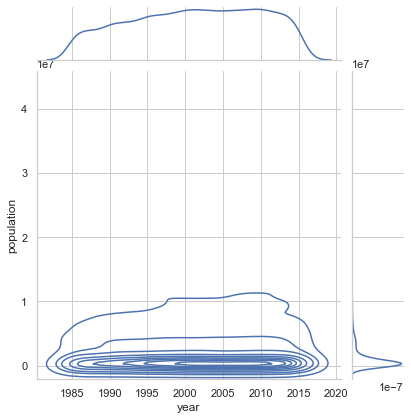

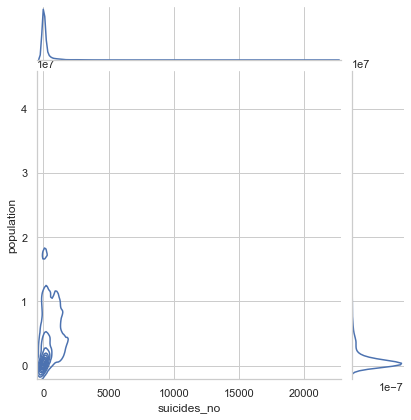

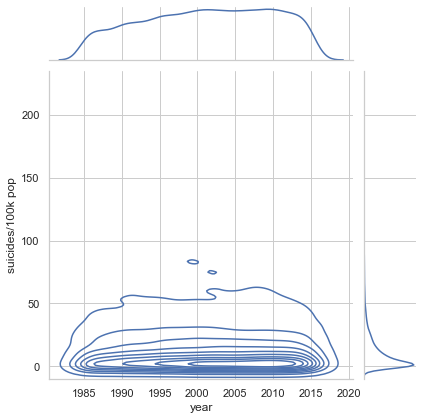

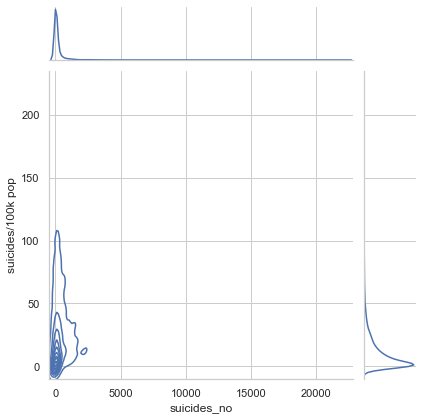

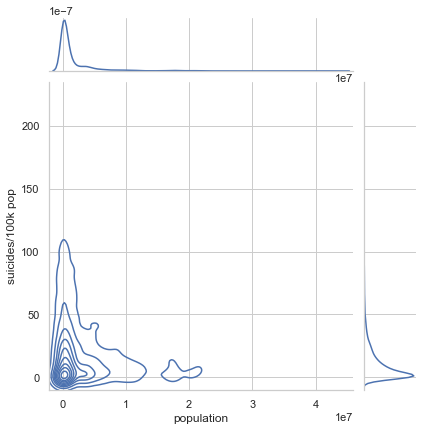

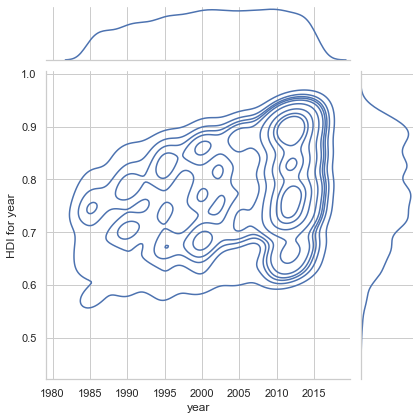

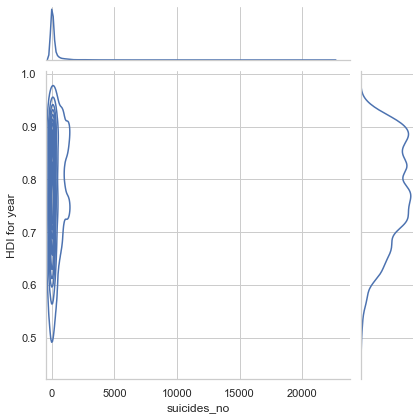

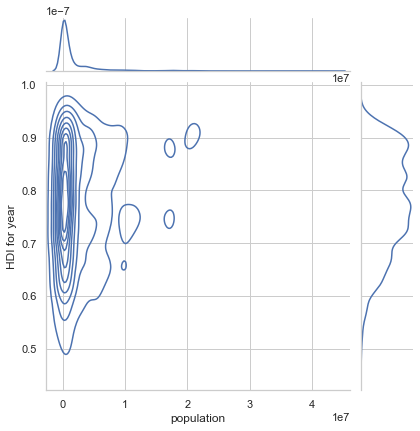

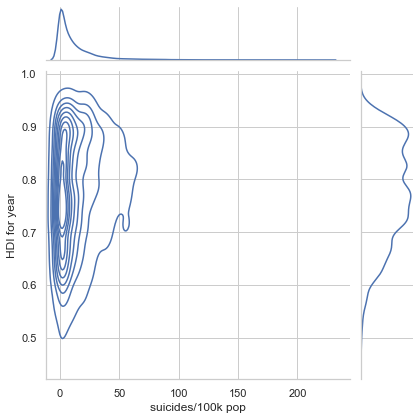

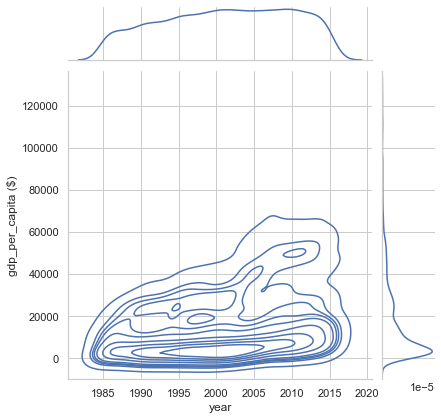

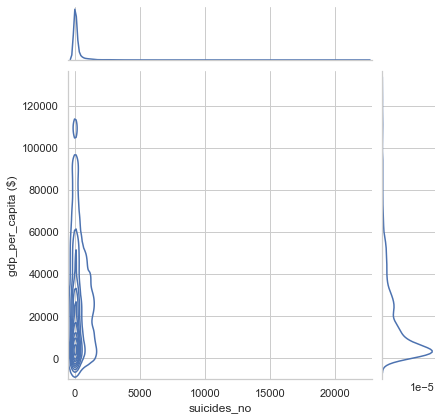

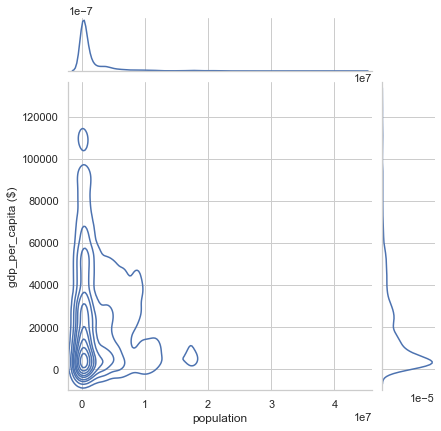

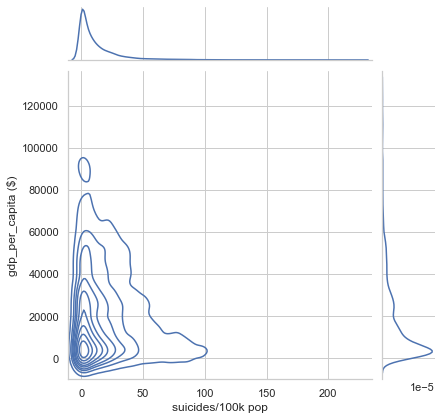

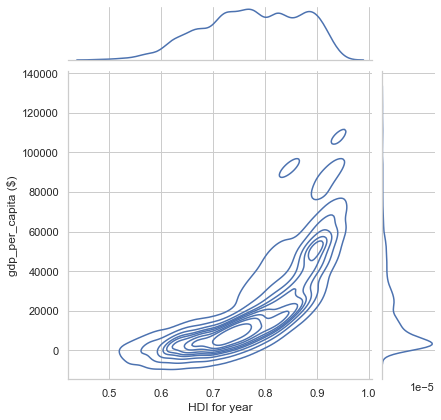

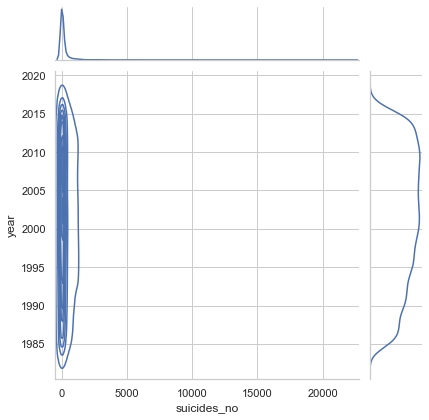

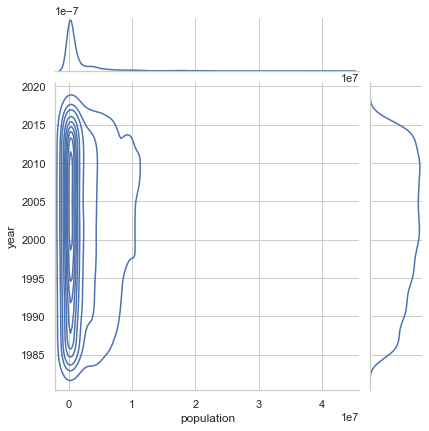

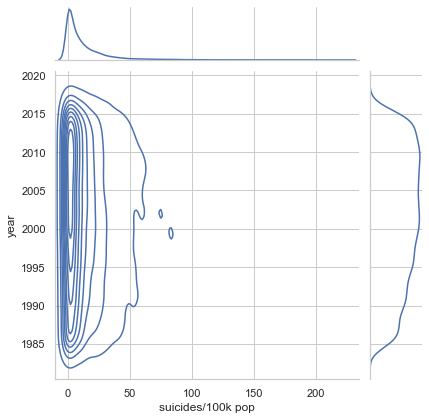

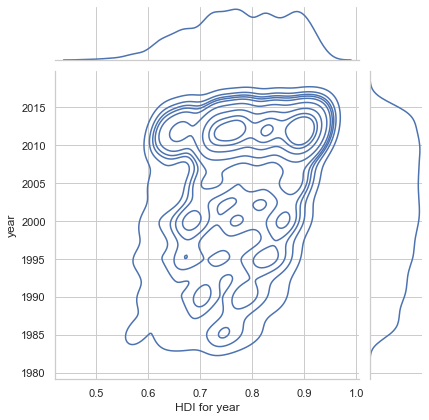

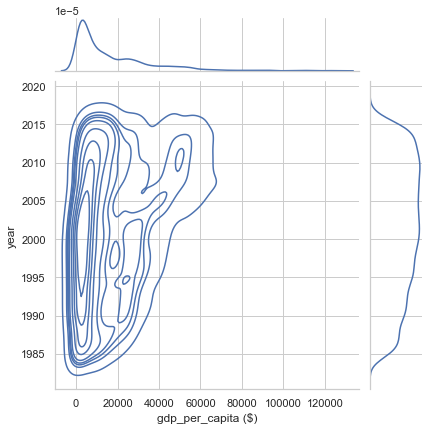

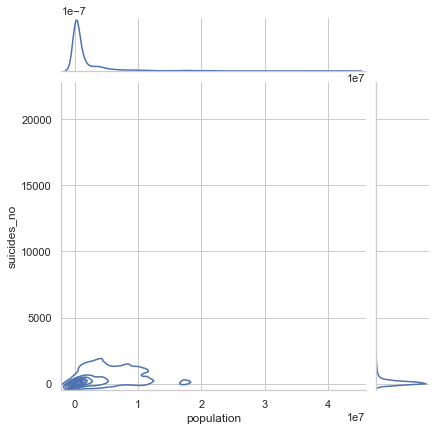

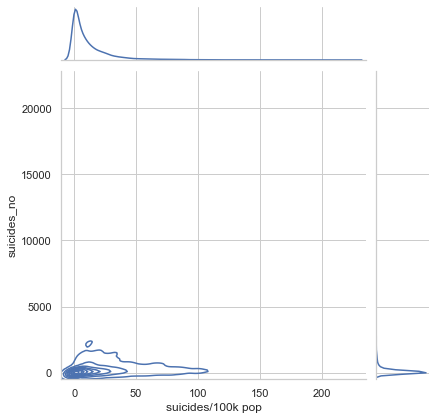

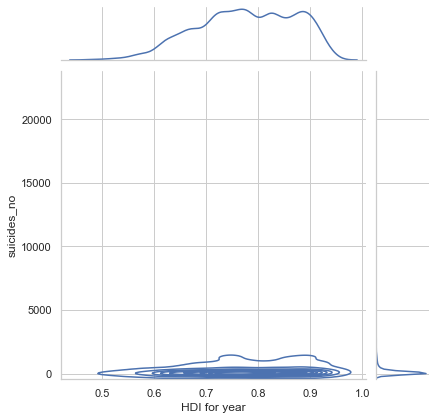

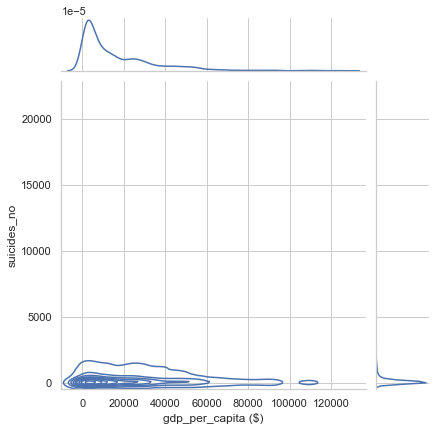

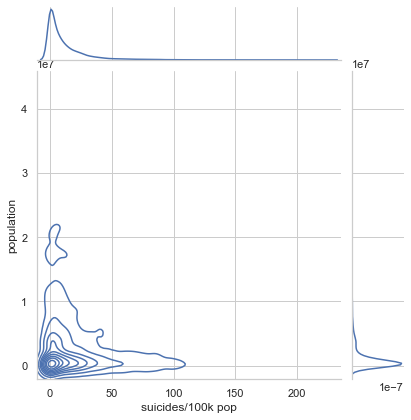

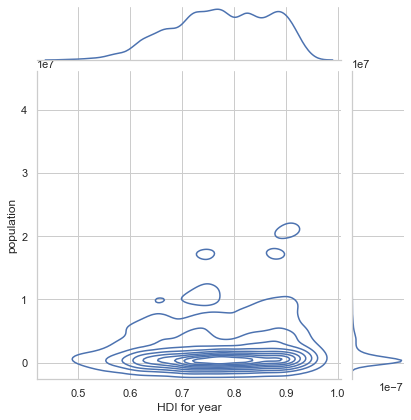

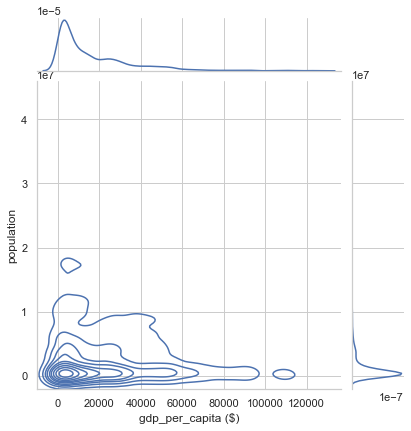

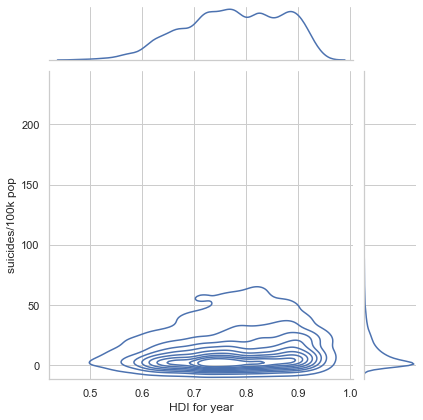

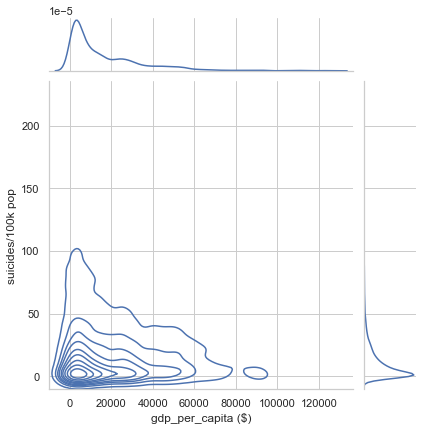

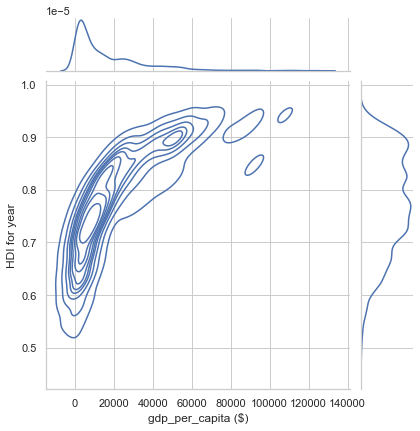

In [46]:
graph = sns.PairGrid(df)
graph.map_diag(sns.barplot)
graph.map_offdiag(sns.jointplot,kind='kde')